1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

3. In the first cell of your notebook, import the required packages with their customary aliases as follows (see the python below):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
- Take a look at the first 10 rows.
- Look at the last 5 rows. Do you see a problem?
- Redo the read_csv() call to correct this issue - do not modify the original csv file.

looked at that with the .head(10) and .tail() function, found out we have to remove the last 2 rows because they are footnotes

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

Done with 2 separate functions and then I aggregated them.

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

checked with gdp_df.info() and columns are object, int and float

In [3]:
gdp_df = (gdp_df
    .drop('Value Footnotes', axis=1)
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
    )  

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice? years 1990 - 2017; number of values increases with years

In [4]:
gdp_df['Year'].value_counts()

2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2018    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
2019    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations? There are 238 countries in the dataset, least represented Nauru, Cayman Islands, Sint Maarten, Turks and Caicos Islands, Djibouti. I'd imagine they were not countries yet in 1991

In [5]:
gdp_df['Country'].value_counts(sort=True)

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

interestingly, gdp_df[gdp_df['Country'] == 'Slovenia'] shows Slovenia as a country in 1990, which most definitely it wasn't until 1991

9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [7]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [10]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution? poisson

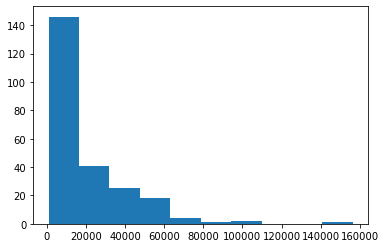

In [22]:
plt.hist(gdp_2014["GDP_Per_Capita"], bins=10)
plt.show()

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014. top 5: Macao SAR, China, Luxembourg, Quatar, Singapore, Bermuda. Bottom 5: Niger, Dem. Rep. Congo, Malawi, Burundi, Central African Republic.

In [25]:
gdp_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777
